In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
landing_data = pd.read_csv("datasets/ab_data.csv")
landing_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Finding data that makes misleading

In [3]:
landing_data.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [4]:
landing_data.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


Now we want to create clean data

In [5]:
d1 = landing_data.query('group == "control" and landing_page == "old_page"')
d1

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [6]:
d2 = landing_data.query('group == "treatment" and landing_page == "new_page"')
d2

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [7]:
landing_data = d1.merge(d2, how='outer')
landing_data.head()

,user_id,timestamp,group,landing_page,converted
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2017-01-19 19:20:56.438330,control,old_page,0
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0


Now we are going to delete datas that are same

In [8]:
sum(landing_data['user_id'].duplicated())

1

In [9]:
landing_data['user_id'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
290580    False
290581    False
290582    False
290583    False
290584    False
Name: user_id, Length: 290585, dtype: bool

In [10]:
landing_data[landing_data['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
131713,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


~ means we are working with the oposite part

In [11]:
landing_data = landing_data[~landing_data['user_id'].duplicated()]
landing_data

,user_id,timestamp,group,landing_page,converted
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2017-01-19 19:20:56.438330,control,old_page,0
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0
...,...,...,...,...,...
290580,945994,2017-01-03 14:41:21.565258,control,old_page,0
290581,945996,2017-01-09 18:58:19.952277,treatment,new_page,0
290582,945997,2017-01-04 06:56:24.658147,control,old_page,0
290583,945998,2017-01-16 07:08:02.207969,control,old_page,0


In [12]:
sum(landing_data['user_id'].duplicated())

0

A and B

In [13]:
landing_data_control = landing_data.query('group == "control"')
landing_data_treatment = landing_data.query('group == "treatment"')

In [14]:
landing_data_control['converted'].mean()

0.1203863045004612

In [15]:
landing_data_treatment['converted'].mean()

0.11880806551510564

In [16]:
1 - landing_data_control['converted'].mean()

0.8796136954995388

Well we don't need ab test to see if the new page is better at selling or not because the stats of sells in the new website is less than sells in the old website

 But we can see if new design make the website sell less or not


We can create labels for simulation using numpy random

In [17]:
treatment_converted_label = np.random.choice([1,0], len(landing_data_treatment), p = [(landing_data.converted.mean()),(1-(landing_data.converted.mean()))])
treatment_converted_label

array([0, 1, 1, ..., 1, 0, 0])

(array([127905.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17405.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

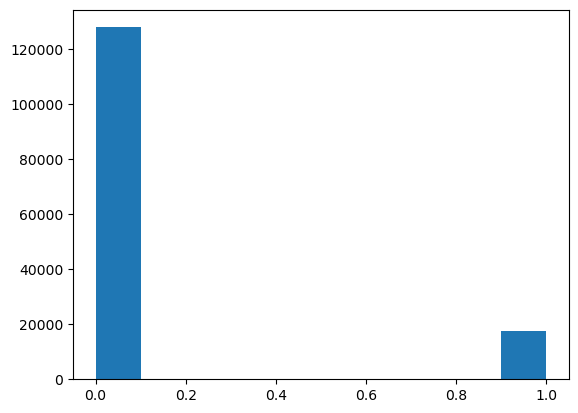

In [18]:
plt.hist(treatment_converted_label)

In [19]:
control_converted_label = np.random.choice([1,0], len(landing_data_control), p = [(landing_data.converted.mean()),(1-(landing_data.converted.mean()))])
control_converted_label

array([0, 1, 0, ..., 0, 0, 0])

(array([127959.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17315.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

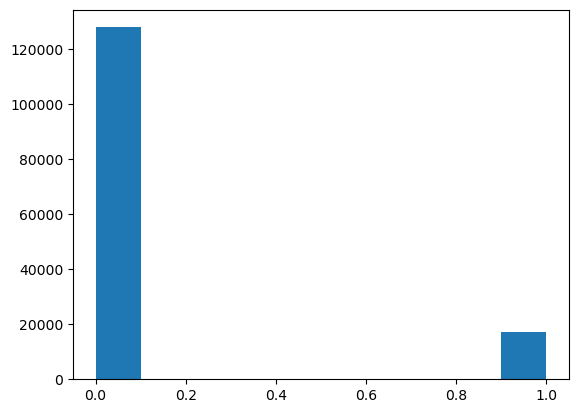

In [20]:
plt.hist(control_converted_label)

But we can simulate the data with bionomial distribution which is better
Because it gives us the mean directly

In [21]:
treatment_converted_mean = np.random.binomial(len(landing_data_treatment), landing_data.converted.mean(), 10000)/len(landing_data_treatment)
treatment_converted_mean

array([0.12028766, 0.1194756 , 0.11909022, ..., 0.11995733, 0.11956507,
       0.11953066])

In [22]:
control_converted_mean = np.random.binomial(len(landing_data_control), landing_data.converted.mean(), 10000)/len(landing_data_control)
control_converted_mean

array([0.1203863 , 0.12022798, 0.12061346, ..., 0.12091634, 0.11965665,
       0.11964288])

In [23]:
mean_diffs = treatment_converted_mean - control_converted_mean
mean_diffs

array([-9.86436375e-05, -7.52379103e-04, -1.52324055e-03, ...,
       -9.59004805e-04, -9.15810292e-05, -1.12223135e-04])

In [24]:
ab_mean_diff = landing_data_treatment.converted.mean() - landing_data_control.converted.mean()
ab_mean_diff

-0.0015782389853555567

In [25]:
(mean_diffs > ab_mean_diff).mean() * 100

90.41

This means the probability of the coincidence of this action is this
If it passes the treshold that means it is by luck

In [26]:
(mean_diffs < ab_mean_diff).mean() * 100

9.59

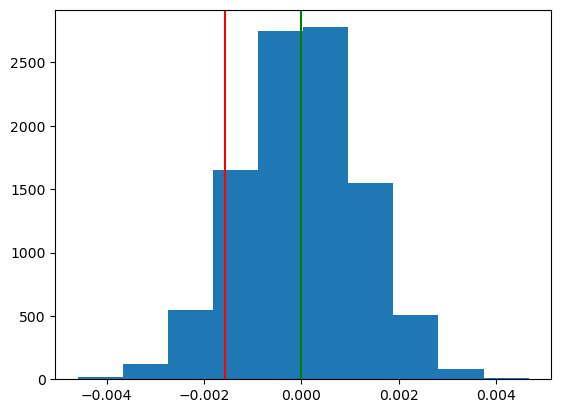

In [27]:
plt.hist(mean_diffs)
low = ab_mean_diff
high = mean_diffs.mean()
plt.axvline(x=low, color='r')
plt.axvline(x=high, color='g')